# 加载需要的通用包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据

In [29]:
raw_train_data=pd.read_csv('input/train.csv',index_col=0)
raw_test_data=pd.read_csv('input/test.csv',index_col=0)
raw_train_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
raw_test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 数据预处理

## 分割数据

将训练集中的label和样本特征分开，以备训练用。

In [23]:
train_x=raw_train_data.drop('Survived',axis=1)
train_x.head()
train_x.shape

(891, 10)

In [21]:
train_y=pd.DataFrame(index=raw_train_data.index,data={'Survived':raw_train_data['Survived']})
train_y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


## 合并数据

将训练样本和测试样本合并，一起做一些处理。

In [35]:
all_data=pd.concat([train_x,raw_test_data],axis=0)
all_data.shape

(1309, 10)

## 特征选择

这里我仅仅采用简单目测的方法来选择特征，我们发现，数据中有名字这一项，而其实这一项并不重要。

因此，我们把名字这一项去掉。

真实的特征选择会有更多科学的方法，比如PCA，比如协方差矩阵等等。

In [123]:
all_data_del=all_data.drop('Name',axis=1)
all_data_del.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,female,35.0,1,0,113803,53.1000,C123,S
5,3,male,35.0,0,0,373450,8.0500,NaN,S


## 特征查看

我们通过阅读文档知道，这里基本上所有的值都是category量，因此一些nan的值，就不能再用mean什么的去填补的。

我们通过统计信息，绘图等方式查看特征和label之间的关系。
### 简单看一下特征的统计信息

In [42]:
all_data_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 142.3+ KB


In [43]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [44]:
raw_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 绘图查看特征的分布

注意，这里我们只是查看了一下内容：

    1. 有多少获救/没获救
    
    2. 不同客舱的人数
    
    3. 获救的人的年龄分布和没获救的年龄分布
    
    4. 不同客舱的年龄分布
    
    5. 各个港口上岸的人数

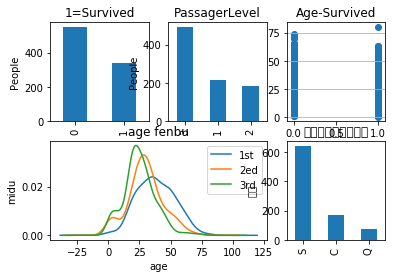

In [55]:
%matplotlib inline
fig=plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
raw_train_data.Survived.value_counts().plot(kind='bar')
plt.title("1=Survived")
plt.ylabel("People")

plt.subplot2grid((2,3),(0,1))
raw_train_data.Pclass.value_counts().plot(kind='bar')
plt.title('PassagerLevel')
plt.ylabel('People')

plt.subplot2grid((2,3),(0,2))
plt.scatter(raw_train_data.Survived,raw_train_data.Age)
plt.grid(b=True,which='major',axis='y')
plt.title('Age-Survived')

plt.subplot2grid((2,3),(1,0), colspan=2)
raw_train_data.Age[raw_train_data.Pclass == 1].plot(kind='kde')   
raw_train_data.Age[raw_train_data.Pclass == 2].plot(kind='kde')
raw_train_data.Age[raw_train_data.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"midu") 
plt.title(u"age fenbu")
plt.legend((u'1st', u'2ed',u'3rd'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
raw_train_data.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

### 绘图查看特征与是否获救之间的关系

下面，我们要查看这些特征和是否获救之间的关系。

**客舱等级和获救与否的关系**

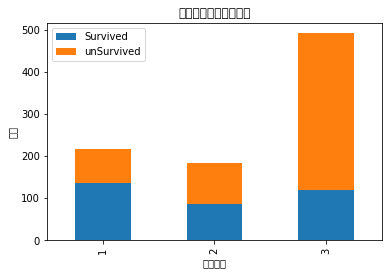

In [57]:
%matplotlib inline
fig=plt.figure()
fig.set(alpha=0.2)

Survived0=raw_train_data.Pclass[raw_train_data.Survived==0].value_counts()
Survived1=raw_train_data.Pclass[raw_train_data.Survived==1].value_counts()
df=pd.DataFrame(data={'Survived':Survived1,'unSurvived':Survived0})
df.plot(kind='bar',stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

**性别与获救与否的关系**

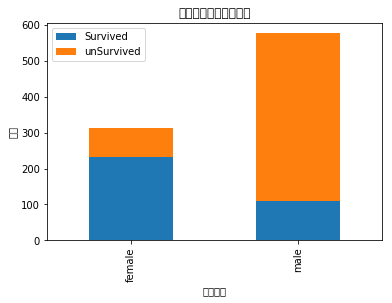

In [58]:
%matplotlib inline
fig=plt.figure()
fig.set(alpha=0.2)

Survived0=raw_train_data.Sex[raw_train_data.Survived==0].value_counts()
Survived1=raw_train_data.Sex[raw_train_data.Survived==1].value_counts()
df=pd.DataFrame(data={'Survived':Survived1,'unSurvived':Survived0})
df.plot(kind='bar',stacked=True)
plt.title(u"各乘客性别的获救情况")
plt.xlabel(u"乘客性别") 
plt.ylabel(u"人数") 
plt.show()

**不同客舱内不同的性别的获救情况**

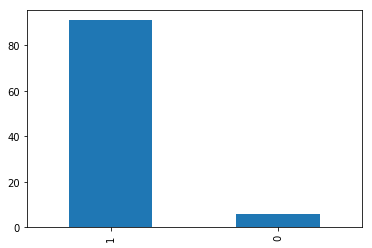

In [64]:
%matplotlib inline
raw_train_data.Survived[raw_train_data.Pclass==1][raw_train_data.Sex=='female'].value_counts().plot(kind='bar')


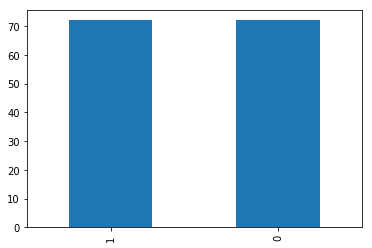

In [65]:
raw_train_data.Survived[raw_train_data.Pclass==3][raw_train_data.Sex=='female'].value_counts().plot(kind='bar')

**登陆港口与获救与否**

In [77]:
Survived0=raw_train_data.Embarked[raw_train_data.Survived==0].value_counts()
Survived1=raw_train_data.Embarked[raw_train_data.Survived==1].value_counts()
df=pd.DataFrame({u'Survived':Survived1, u'Unsurvived':Survived0})
df.head()

,Survived,Unsurvived
S,217,427
C,93,75
Q,30,47


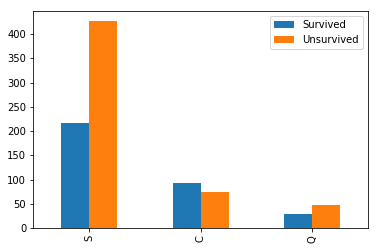

In [78]:
df.plot(kind='bar')

**有船舱号和没船舱号与获救与否的关系**

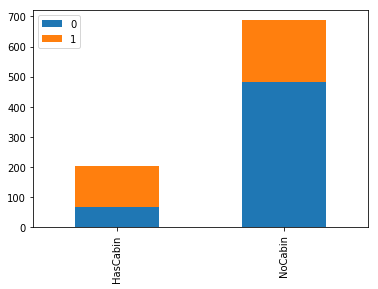

In [86]:
Survived_cabin=raw_train_data.Survived[pd.notnull(raw_train_data.Cabin)].value_counts()
Survived_nocabin=raw_train_data.Survived[pd.isnull(raw_train_data.Cabin)].value_counts()

df=pd.DataFrame({u'HasCabin':Survived_cabin, u'NoCabin':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)


## 特征处理

因为原始的数据中，很多特征里面的内容是不完全的，需要进一步处理才行，比如有的特征缺失某个值，有的特征非常的长尾等等。

### age数据处理

age数据我们理解为是一个category类型的数据，并且其中包含有一些nan值。

对于nan值的处理方法比较多，这里选择填充的办法进行处理。

但是，这里的age虽然表示category的特征，但本身是数值型的，取均值填充什么的不太好，那么我们通过拟合的方式选择：

    1、将数据按照有年龄（不是nan）和没有年龄（是nan）分成两部分A，B。
    
    2、对于A部分，我们将年龄作为label，其他值作为样本，训练一个model出来。这里选择使用randomforest。
    
    3、对于B部分，我们将其认为是测试数据，利用训练好的模型，取计算每个样本的年龄。
    
    4、这里，我们把它看看做是一个regressor问题。

**数据分割**

这里我们把训练数据和测试数据一起处理了哈

In [87]:
all_data_del.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,female,35.0,1,0,113803,53.1000,C123,S
5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
known_age=all_data_del[pd.notnull(all_data_del.Age)]
unknown_age=all_data_del[pd.isnull(all_data_del.Age)]

**从known_age中，得到label和样本**

In [111]:
# 把这行删了，因为这行有fare为nan
known_age=known_age.drop(1044)
age_train_y=known_age.Age
# 我只需要这些数据进行训练
age_train_x=known_age[['Fare', 'Parch', 'SibSp', 'Pclass']]

age_train_x[pd.isnull(age_train_x.Fare)]

,Fare,Parch,SibSp,Pclass
PassengerId,,,,


**构建模型，开始训练**

In [112]:
from sklearn.ensemble import RandomForestRegressor
# 获取模型
model=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
# 开始训练
model.fit(age_train_x,age_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

**开始预测并替代**

In [125]:
predice_age=model.predict(unknown_age[['Fare', 'Parch', 'SibSp', 'Pclass']])
all_data_nonull=all_data_del.copy()
all_data_nonull.loc[all_data_del.Age.isnull(),'Age']=predice_age

**查看数据**

In [127]:
all_data_nonull.head(20)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,female,35.000000,1,0,113803,53.1000,C123,S
5,3,male,35.000000,0,0,373450,8.0500,NaN,S
6,3,male,23.676551,0,0,330877,8.4583,NaN,Q
7,1,male,54.000000,0,0,17463,51.8625,E46,S
8,3,male,2.000000,3,1,349909,21.0750,NaN,S
9,3,female,27.000000,0,2,347742,11.1333,NaN,S


### 对category特征做one-hot编码

**我们首先需要对cabin做一个简单处理**

我们对有记录的cabin写为yes，没有的写为no

In [133]:
all_data_nonull.loc[all_data_del.Cabin.notnull(),'Cabin']='yes'
all_data_nonull.loc[all_data_del.Cabin.isnull(),'Cabin']='no'

**使用get_dummies进行one-hot编码**

In [134]:
dummies_Cabin=pd.get_dummies(all_data_nonull['Cabin'],prefix='Cabin')
dummies_Embarked=pd.get_dummies(all_data_nonull['Embarked'],prefix='Embarked')
dummies_Sex=pd.get_dummies(all_data_nonull['Sex'],prefix='Sex')
dummies_Pclass=pd.get_dummies(all_data_nonull['Pclass'],prefix='Pclass')

**拼接数据**

In [135]:
concat_data=pd.concat([all_data_nonull,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
concat_data.drop(['Pclass','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

**查看数据**

In [136]:
concat_data.head()

,Age,SibSp,Parch,Fare,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1
2,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0
3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
4,35.0,1,0,53.1000,0,1,0,0,1,1,0,0,1,0
5,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1


### 对numerical数据做归一化

**这里直接使用sklearn的包做归一化了**

In [154]:
import sklearn.preprocessing as preprocessing

scaler=preprocessing.StandardScaler()

age_sacle_parm=scaler.fit(concat_data.Age.reshape(-1,1))
concat_data['Age']=scaler.fit_transform(concat_data['Age'].reshape(-1,1),age_sacle_parm)

concat_data.loc[concat_data.Fare.isnull(),'Fare']=concat_data.Fare.mean()
fare_scale_parm=scaler.fit(concat_data['Fare'].reshape(-1,1))
concat_data['Fare']=scaler.fit_transform(concat_data['Fare'].reshape(-1,1),fare_scale_parm)

concat_data.head()

/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


,Age,SibSp,Parch,Fare,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,
1,-0.584980,1,0,-0.503595,1,0,0,0,1,0,0,1,0,1
2,0.604429,1,0,0.734503,0,1,1,0,0,1,0,0,1,0
3,-0.287628,0,0,-0.490544,1,0,0,0,1,0,0,1,1,0
4,0.381415,1,0,0.382925,0,1,0,0,1,1,0,0,1,0
5,0.381415,0,0,-0.488127,1,0,0,0,1,0,0,1,0,1


# 逻辑回归建模

**把训练数据和测试数据分开**

In [158]:
train_data_set_x=concat_data.iloc[:raw_train_data.shape[0]]
test_data_set_x=concat_data.iloc[raw_train_data.shape[0]:]
train_data_set_x.tail()

,Age,SibSp,Parch,Fare,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,
887,-0.213290,0,0,-0.392417,1,0,0,0,1,0,1,0,0,1
888,-0.807994,0,0,-0.063719,0,1,0,0,1,1,0,0,1,0
889,-0.886614,1,2,-0.190364,1,0,0,0,1,0,0,1,1,0
890,-0.287628,0,0,-0.063719,0,1,1,0,0,1,0,0,0,1
891,0.158401,0,0,-0.493927,1,0,0,1,0,0,0,1,0,1


In [160]:
test_data_set_x.shape

(418, 14)

In [161]:
raw_test_data.shape

(418, 10)

**训练模型以及预测**

In [163]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(train_data_set_x,train_y['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
predict_result=model.predict(test_data_set_x)

**保存数据**

In [165]:
result_final=pd.DataFrame(data={'PassengerId':test_data_set_x.index,'Survived':predict_result})
result_final.to_csv('Titanic1.csv',index=False)